In [100]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

uploaded = files.upload()

!ls /content

file_name = list(uploaded.keys())[0]
file_path = f"/content/{file_name}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Banking_Data.xlsx to Banking_Data.xlsx
'Banking Case - Data.xlsx'   Banking_Data.xlsx	 drive	 sample_data


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [102]:
data_1 = pd.read_excel("Banking Case - Data.xlsx",sheet_name = "Customer Demographics")
data_2 = pd.read_excel("Banking Case - Data.xlsx",sheet_name = "Transaction Data")

In [103]:
df = pd.merge(data_1, data_2, on='Customer_number', how='inner')

In [104]:
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [105]:
df.shape

(45211, 20)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   job               45198 non-null  object 
 3   marital           45193 non-null  object 
 4   education         45190 non-null  object 
 5   Annual Income     45194 non-null  object 
 6   Gender            45211 non-null  object 
 7   Sno               45211 non-null  int64  
 8   Insurance         45211 non-null  object 
 9   balance           45156 non-null  object 
 10  housing           45211 non-null  object 
 11  loan              45203 non-null  object 
 12  contact           45168 non-null  object 
 13  duration          45172 non-null  float64
 14  campaign          45211 non-null  int64  
 15  last_contact_day  45211 non-null  int64  
 16  previous          45211 non-null  int64 

In [107]:
#drop the customer id as it is of no use.
df.drop(["Sno","Customer_number"],axis = 1 , inplace = True)
df.head()

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,58,management,married,tertiary,839368,M,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,44,technician,single,secondary,1452858,M,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,33,entrepreneur,married,NaN,4851383,F,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,47,blue collar,married,unknown,3207754,F,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,33,unknown,single,unknown,2562322,M,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


CATEGORICAL ANALYSIS

In [108]:
col=["Insurance","housing","loan","contact","poutcome","Term Deposit","job","marital","education","Gender"]

for i in col:
    print(df[i].value_counts())
    print("*"*30)

no     44396
yes      815
Name: Insurance, dtype: int64
******************************
yes    25130
no     20081
Name: housing, dtype: int64
******************************
no     37959
yes     7244
Name: loan, dtype: int64
******************************
cellular     29282
unknown      12970
telephone     2850
Mobile          29
Tel             20
?               17
Name: contact, dtype: int64
******************************
unknown    36884
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: poutcome, dtype: int64
******************************
no     39914
yes     5289
Name: Term Deposit, dtype: int64
******************************
blue-collar      9623
management       9455
technician       7595
admin.           5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
blue collar       104
Name: job, dtype: 

In [109]:
df['education'] = df['education'].str.replace('ter tiary', 'tertiary', case=False)
df['education'] = df['education'].str.replace('Primary', 'primary', case=False)
df['contact'] = df['contact'].replace('Tel', 'telephone')
df['job'] = df['job'].str.replace('blue collar', 'blue-collar', case=False)

In [110]:
df.replace(["?","????"], float("nan"), inplace=True)

In [111]:
col=["Insurance","housing","loan","contact","poutcome","Term Deposit","job","marital","education","Gender"]

for i in col:
    print(df[i].value_counts())
    print("*"*30)

no     44396
yes      815
Name: Insurance, dtype: int64
******************************
yes    25130
no     20081
Name: housing, dtype: int64
******************************
no     37959
yes     7244
Name: loan, dtype: int64
******************************
cellular     29282
unknown      12970
telephone     2870
Mobile          29
Name: contact, dtype: int64
******************************
unknown    36884
failure     4901
other       1840
success     1511
pending       55
Name: poutcome, dtype: int64
******************************
no     39914
yes     5289
Name: Term Deposit, dtype: int64
******************************
blue-collar      9727
management       9455
technician       7595
admin.           5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************
married     27202
single      12787
divorced     5204
Nam

In [112]:
df.isnull().sum()

age                  0
job                 13
marital             18
education           21
Annual Income       17
Gender               0
Insurance            0
balance             59
housing              0
loan                 8
contact             60
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            20
Term Deposit         8
Count_Txn            1
dtype: int64

In [113]:
df.rename(columns={'Term Deposit': 'Response'}, inplace=True)

In [114]:
df.Response.isna().sum()

8

In [115]:
round(100*(df.Response.isna().sum())/len(df.index),3)

0.018

In [116]:
#drop the records with response missing.
df=df[~df.Response.isna()]

In [117]:
df.Response.isna().sum()

0

In [118]:
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [119]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
Annual Income       17
Gender               0
Insurance            0
balance             59
housing              0
loan                 0
contact              0
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome             0
Response             0
Count_Txn            1
dtype: int64

NUMERICAL ANALYSIS:

In [120]:
columns_to_check = ['balance','duration','campaign','last_contact_day','Count_Txn','age','Annual Income']

# Function to check for negative values in a column
def check_for_negatives(column_name):
    # Check if the column contains numeric values
    if pd.to_numeric(df[column_name], errors='coerce').notna().all():
        # If yes, check for negative values
        if (df[column_name] < 0).any():
            print(f"The column '{column_name}' has negative values.")
        else:
            print(f"The column '{column_name}' does not have negative values.")
    else:
        print(f"The column '{column_name}' contains non-numeric values.")

# Loop through the specified columns
for column in columns_to_check:
    check_for_negatives(column)

The column 'balance' contains non-numeric values.
The column 'duration' contains non-numeric values.
The column 'campaign' does not have negative values.
The column 'last_contact_day' has negative values.
The column 'Count_Txn' contains non-numeric values.
The column 'age' does not have negative values.
The column 'Annual Income' contains non-numeric values.


In [121]:
columns_to_convert = ['balance', 'duration', 'Count_Txn','Annual Income']

# Function to convert non-numeric values to numeric in a column
def convert_to_numeric(column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


# Loop through the specified columns
for column in columns_to_convert:
    convert_to_numeric(column)

In [122]:
column_name = ['balance','duration','campaign','last_contact_day','Count_Txn','age','Annual Income']

# Check if any element in the column is negative
for column_name in column_name:
  if (df[column_name] < 0).any():
    print(f"The column '{column_name}' has negative values.")

The column 'balance' has negative values.
The column 'duration' has negative values.
The column 'last_contact_day' has negative values.
The column 'Count_Txn' has negative values.


In [123]:
# Replacing last_contact_day with its abs value except for -1
df['last_contact_day'] = np.where(df['last_contact_day'] == -1, 0, np.abs(df['last_contact_day']))

In [124]:
df['last_contact_day'].describe()

count    45203.000000
mean        41.841913
std         99.463323
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        871.000000
Name: last_contact_day, dtype: float64

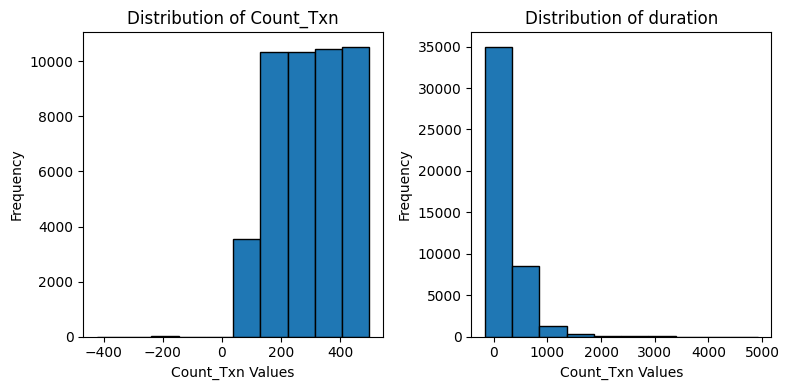

In [125]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot a histogram in the first subplot
axs[0].hist(df['Count_Txn'].dropna(), bins=10, edgecolor='black')
axs[0].set_title('Distribution of Count_Txn')
axs[0].set_xlabel('Count_Txn Values')
axs[0].set_ylabel('Frequency')

# Plot a histogram in the first subplot
axs[1].hist(df['duration'].dropna(), bins=10, edgecolor='black')
axs[1].set_title('Distribution of duration')
axs[1].set_xlabel('Count_Txn Values')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplot
plt.show()


In [126]:
columns_to_modify = ['duration', 'Count_Txn']

# Check if any element in the column is negative
for column_name in columns_to_modify:
    # Replace negative values with the median
    df.loc[df[column_name] < 0, column_name] = df[column_name].median()
    # Replace missing values with the median
    df[column_name].fillna(df[column_name].median(), inplace=True)

In [127]:
column_name = ['balance','duration','campaign','last_contact_day','Count_Txn','age','Annual Income']

# Check if any element in the column is negative
for column_name in column_name:
  if (df[column_name] < 0).any():
    print(f"The column '{column_name}' has negative values.")

The column 'balance' has negative values.


In [128]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
Annual Income       18
Gender               0
Insurance            0
balance             81
housing              0
loan                 0
contact              0
duration             0
campaign             0
last_contact_day     0
previous             0
poutcome             0
Response             0
Count_Txn            0
dtype: int64

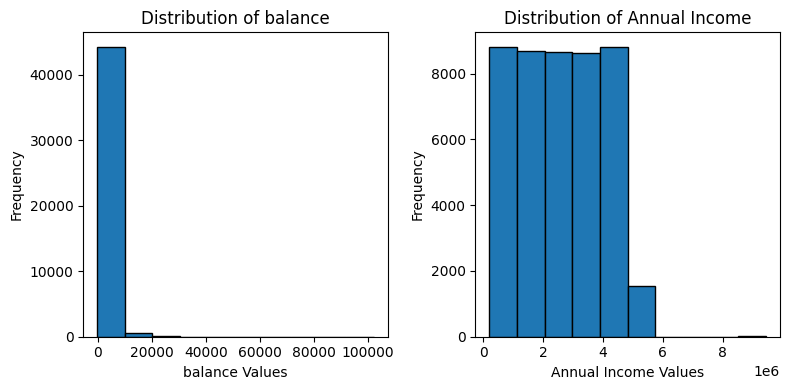

In [129]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot a histogram in the first subplot
axs[0].hist(df['balance'].dropna(), bins=10, edgecolor='black')
axs[0].set_title('Distribution of balance')
axs[0].set_xlabel('balance Values')
axs[0].set_ylabel('Frequency')

# Plot a histogram in the first subplot
axs[1].hist(df['Annual Income'].dropna(), bins=10, edgecolor='black')
axs[1].set_title('Distribution of Annual Income')
axs[1].set_xlabel('Annual Income Values')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplot
plt.show()

In [130]:
# Calculate the median of the 'balance' column
median_balance = df['balance'].median()

# Fill missing values in the 'balance' column with its median
df['balance'].fillna(median_balance, inplace=True)

In [131]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
Annual Income       18
Gender               0
Insurance            0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
last_contact_day     0
previous             0
poutcome             0
Response             0
Count_Txn            0
dtype: int64

In [132]:
df['Annual Income'] = df['Annual Income'].fillna(0)

In [133]:
df.isnull().sum()

age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Response            0
Count_Txn           0
dtype: int64

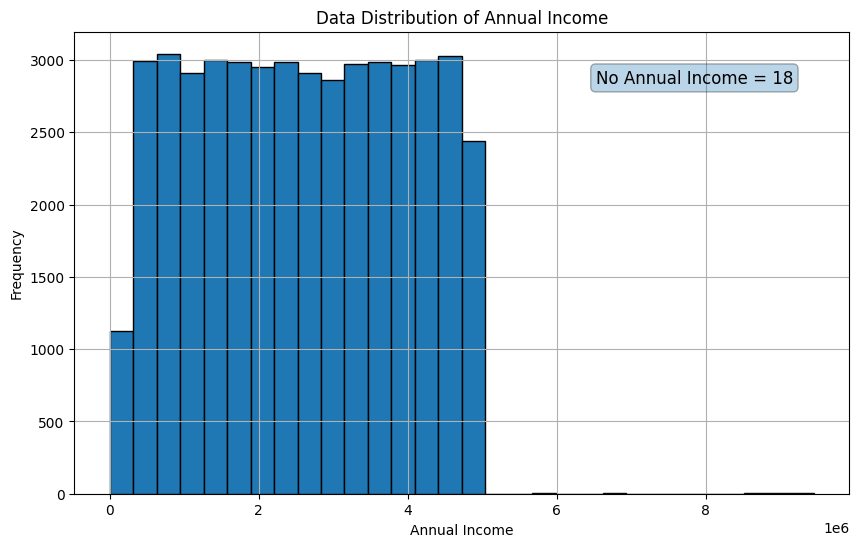

In [135]:
# Count the number of customers with 0 annual income
zero_income_count = (df['Annual Income'] == 0).sum()

# Plot the data distribution of annual income
plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income'].dropna(), bins=30, edgecolor='black')
plt.title('Data Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)

# Annotate the plot with the number of customers with 0 annual income
plt.annotate(f'No Annual Income = {zero_income_count}', xy=(0.8, 0.9), xycoords='axes fraction',
             fontsize=12, ha='center', va='center', bbox=dict(boxstyle='round', alpha=0.3))

# Show the plot
plt.show()

<ipython-input-138-5b9a5f24b701>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(zero_income['age'], kde=True, palette='viridis')


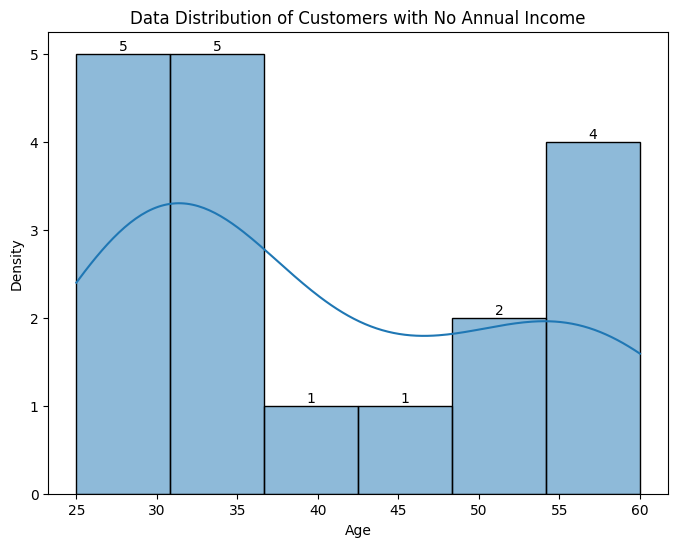

In [138]:
customers_no_income = (df['Annual Income'] == 0).sum()
zero_income = df.loc[df['Annual Income']==0]
# Plotting the data distribution for customers with no annual income
plt.figure(figsize=(8, 6))
ax = sns.histplot(zero_income['age'], kde=True, palette='viridis')

# Adding count labels above each bar in the histogram
for rect in ax.patches:
    height = rect.get_height()
    count = int(height)
    ax.text(rect.get_x() + rect.get_width() / 2, height, count, ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Data Distribution of Customers with No Annual Income')
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45203 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45203 non-null  int64  
 1   job               45203 non-null  object 
 2   marital           45203 non-null  object 
 3   education         45203 non-null  object 
 4   Annual Income     45203 non-null  float64
 5   Gender            45203 non-null  object 
 6   Insurance         45203 non-null  object 
 7   balance           45203 non-null  float64
 8   housing           45203 non-null  object 
 9   loan              45203 non-null  object 
 10  contact           45203 non-null  object 
 11  duration          45203 non-null  float64
 12  campaign          45203 non-null  int64  
 13  last_contact_day  45203 non-null  int64  
 14  previous          45203 non-null  int64  
 15  poutcome          45203 non-null  object 
 16  Response          45203 non-null  object

HANDLING OUTLIERS

<ipython-input-140-b69974416c8e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Annual Income')

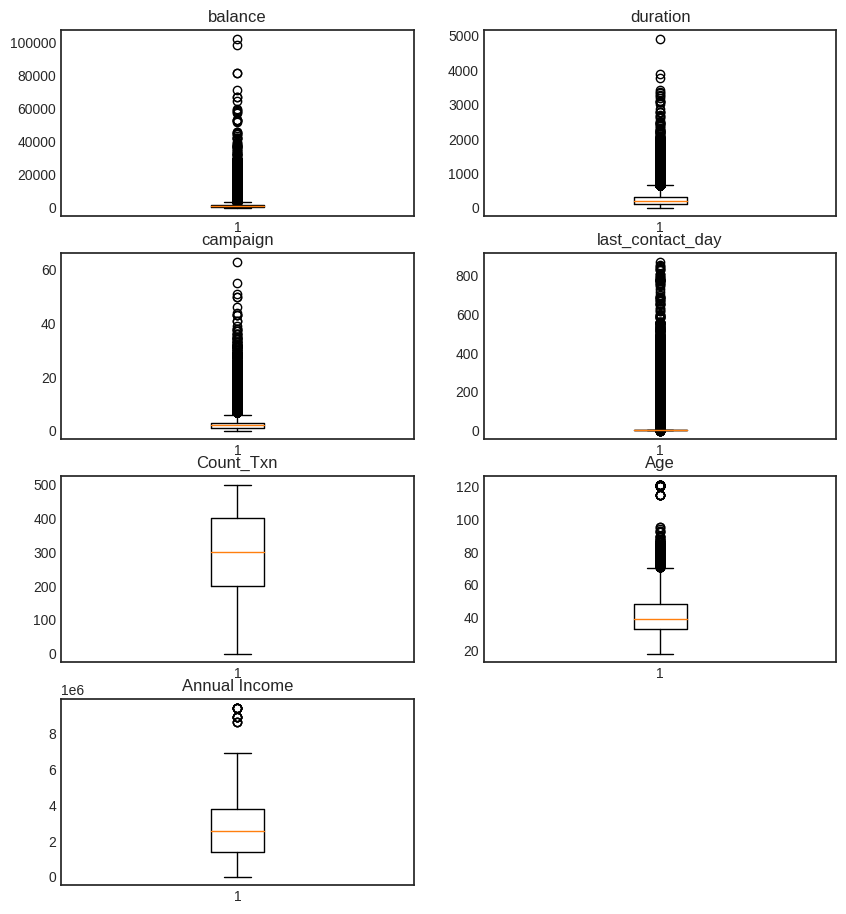

In [140]:
plt.figure(figsize = (10, 14))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['balance'])
ax.set_title('balance')
ax=plt.subplot(522)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(df['last_contact_day'])
ax.set_title('last_contact_day')
ax=plt.subplot(525)
plt.boxplot(df['Count_Txn'])
ax.set_title('Count_Txn')
ax=plt.subplot(526)
plt.boxplot(df['age'])
ax.set_title('Age')
ax=plt.subplot(527)
plt.boxplot(df['Annual Income'])
ax.set_title('Annual Income')

In [141]:
numerical_features = ['balance', 'duration', 'campaign', 'last_contact_day', 'age','Annual Income']

for col in numerical_features:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    print(f'Upper limit for {col}: {upper_limit}')
    print(f'Lower limit for {col}: {lower_limit}')


Upper limit for balance: 10477.240449622266
Lower limit for balance: -7646.163065377858
Upper limit for duration: 1030.6022455135844
Lower limit for duration: -514.3458908468587
Upper limit for campaign: 12.023745367482473
Lower limit for campaign: -6.499598740046242
Upper limit for last_contact_day: 340.2318814409074
Lower limit for last_contact_day: -256.5480551461925
Upper limit for age: 73.49708525505469
Lower limit for age: 8.46420050031552
Upper limit for Annual Income: 6777434.295722107
Lower limit for Annual Income: -1586658.7229061434


In [142]:
numerical_features = ['balance', 'duration', 'campaign', 'last_contact_day', 'age','Annual Income']

# Create a new DataFrame as a copy of the original
new_df = df.copy()

for col in numerical_features:
    # Calculate upper and lower limits for each feature
    upper_limit = new_df[col].mean() + 3 * new_df[col].std()
    lower_limit = new_df[col].mean() - 3 * new_df[col].std()

    # Cap the outlier values in each feature to their respective upper and lower limits
    new_df.loc[new_df[col] > upper_limit, col] = upper_limit
    new_df.loc[new_df[col] < lower_limit, col] = lower_limit

<ipython-input-143-c48187bb8cee>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Age')

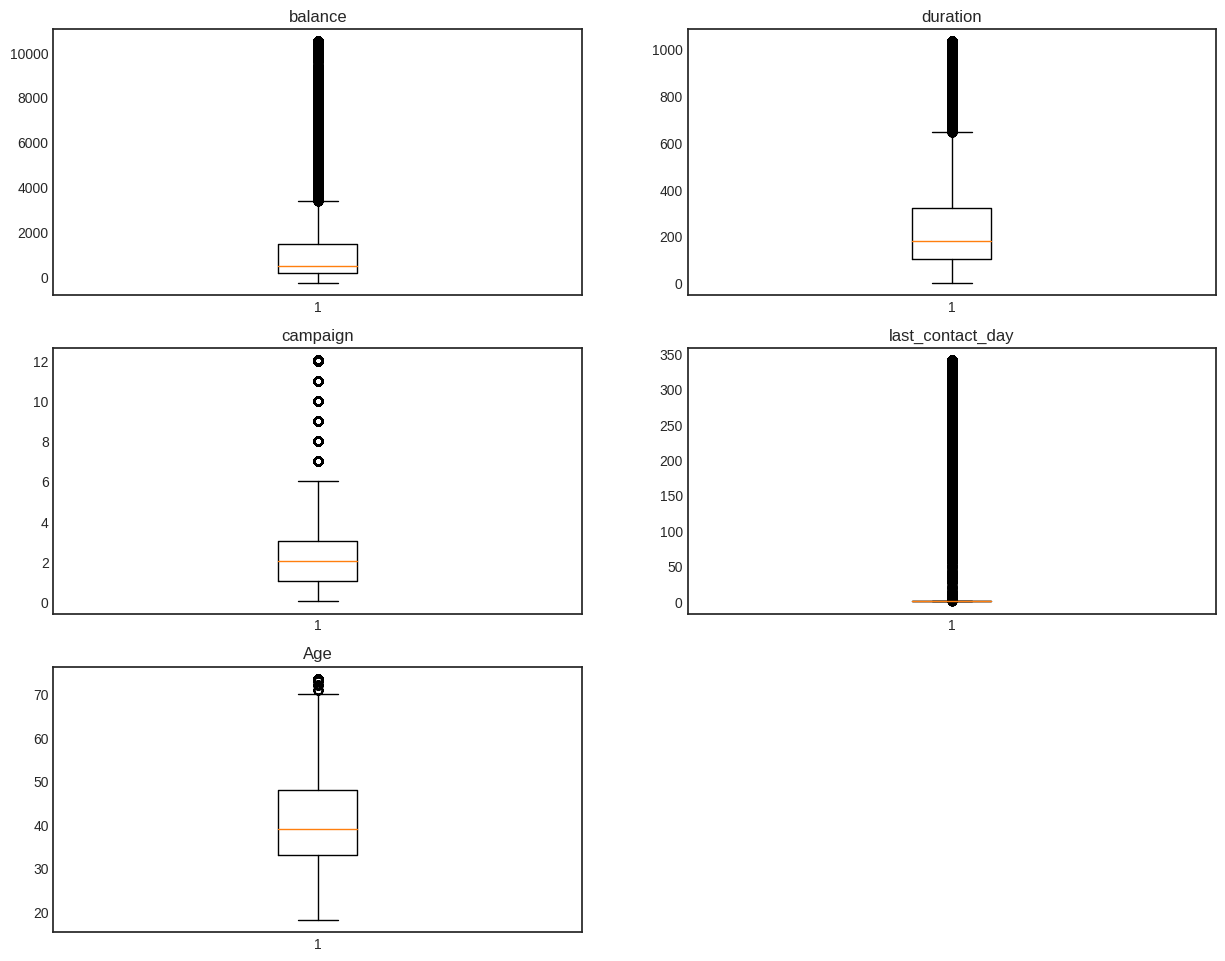

In [143]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(new_df['balance'])
ax.set_title('balance')
ax=plt.subplot(522)
plt.boxplot(new_df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(new_df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(new_df['last_contact_day'])
ax.set_title('last_contact_day')
ax=plt.subplot(525)
plt.boxplot(new_df['age'])
ax.set_title('Age')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45203 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45203 non-null  int64  
 1   job               45203 non-null  object 
 2   marital           45203 non-null  object 
 3   education         45203 non-null  object 
 4   Annual Income     45203 non-null  float64
 5   Gender            45203 non-null  object 
 6   Insurance         45203 non-null  object 
 7   balance           45203 non-null  float64
 8   housing           45203 non-null  object 
 9   loan              45203 non-null  object 
 10  contact           45203 non-null  object 
 11  duration          45203 non-null  float64
 12  campaign          45203 non-null  int64  
 13  last_contact_day  45203 non-null  int64  
 14  previous          45203 non-null  int64  
 15  poutcome          45203 non-null  object 
 16  Response          45203 non-null  object

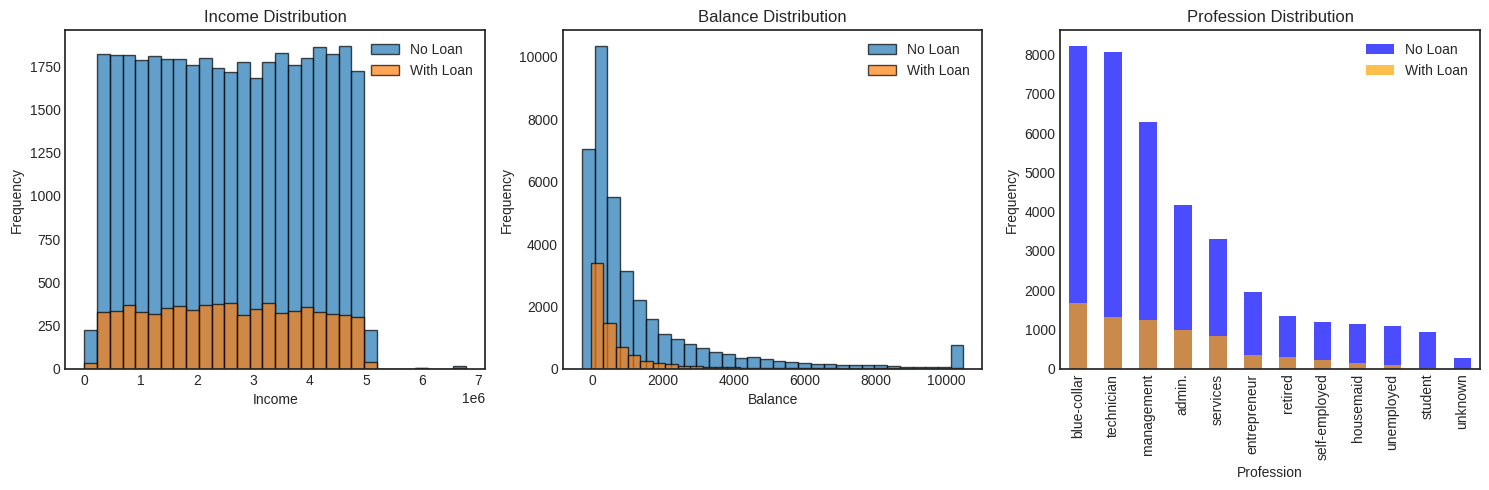

In [145]:
# Filter customers without any type of loan
customers_without_loan = new_df[new_df['loan'] == 'no']

# Filter customers with loans
customers_with_loan = new_df[new_df['loan'] == 'yes']

# Plot the distribution of income for customers without loans
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(customers_without_loan['Annual Income'], bins=30, edgecolor='black', alpha=0.7, label='No Loan')
plt.hist(customers_with_loan['Annual Income'], bins=30, edgecolor='black', alpha=0.7, label='With Loan')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

# Plot the distribution of balance for customers without loans
plt.subplot(1, 3, 2)
plt.hist(customers_without_loan['balance'], bins=30, edgecolor='black', alpha=0.7, label='No Loan')
plt.hist(customers_with_loan['balance'], bins=30, edgecolor='black', alpha=0.7, label='With Loan')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

# Plot the distribution of professions for customers without loans
plt.subplot(1, 3, 3)
customers_without_loan['job'].value_counts().plot(kind='bar', color='blue', alpha=0.7, label='No Loan')
customers_with_loan['job'].value_counts().plot(kind='bar', color='orange', alpha=0.7, label='With Loan')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

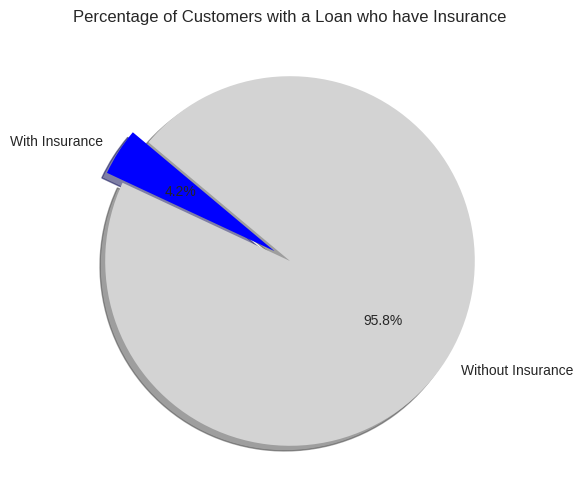

Percentage of customers with a loan who have insurance: 4.16%


In [146]:
# Filter customers with a loan
customers_with_loan = new_df[new_df['loan'] == 'yes']

# Calculate the percentage of customers with a loan who have insurance
percentage_with_insurance = (customers_with_loan['Insurance'] == 'yes').mean() * 100

# Visualize the data
plt.figure(figsize=(6, 6))
labels = ['With Insurance', 'Without Insurance']
sizes = [percentage_with_insurance, 100 - percentage_with_insurance]
colors = ['blue', 'lightgray']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Customers with a Loan who have Insurance')
plt.show()

# Display the percentage
print(f'Percentage of customers with a loan who have insurance: {percentage_with_insurance:.2f}%')

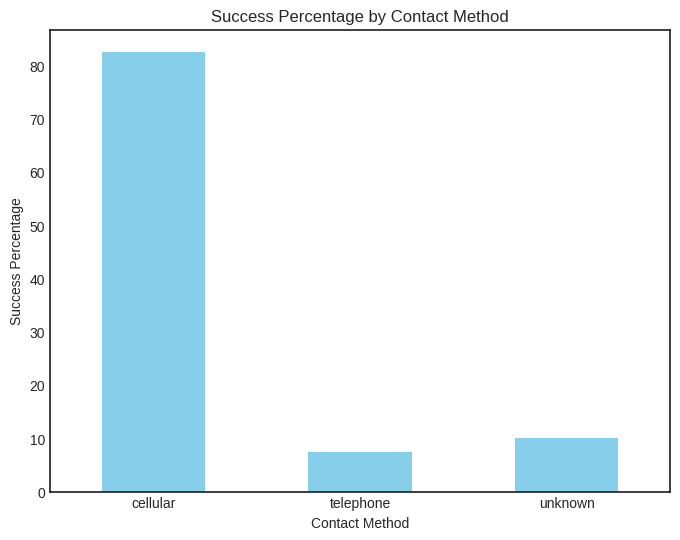

In [147]:
# Filter relevant data (considering 'Term Deposit' == 'yes' as success)
successful_contact_data = new_df[new_df['Response'] == 'yes']

# Calculate success percentage by contact method
success_percentage = successful_contact_data.groupby('contact').size() / len(successful_contact_data) * 100

# Visualize the results
plt.figure(figsize=(8, 6))
success_percentage.plot(kind='bar', color='skyblue')
plt.title('Success Percentage by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Success Percentage')
plt.xticks(rotation=0)
plt.show()

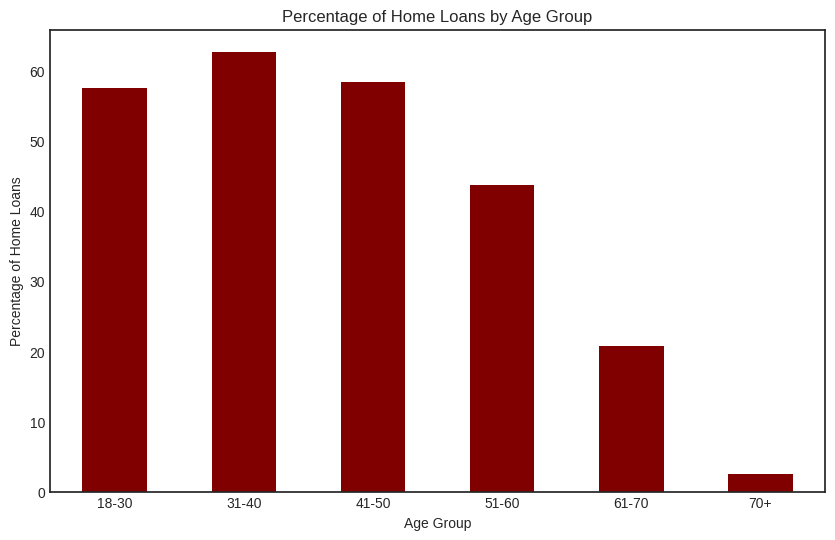

In [148]:
# Define age groups
bins = [18, 30, 40, 50, 60, 70, 100]  # Adjust age group boundaries as needed
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Create age groups
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)

# Calculate percentage of home loans for each age group
percentage_home_loans = new_df.groupby('age_group')['housing'].apply(lambda x: (x == 'yes').mean()) * 100

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_home_loans.plot(kind='bar', color='maroon')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.xticks(rotation=0)
plt.show()

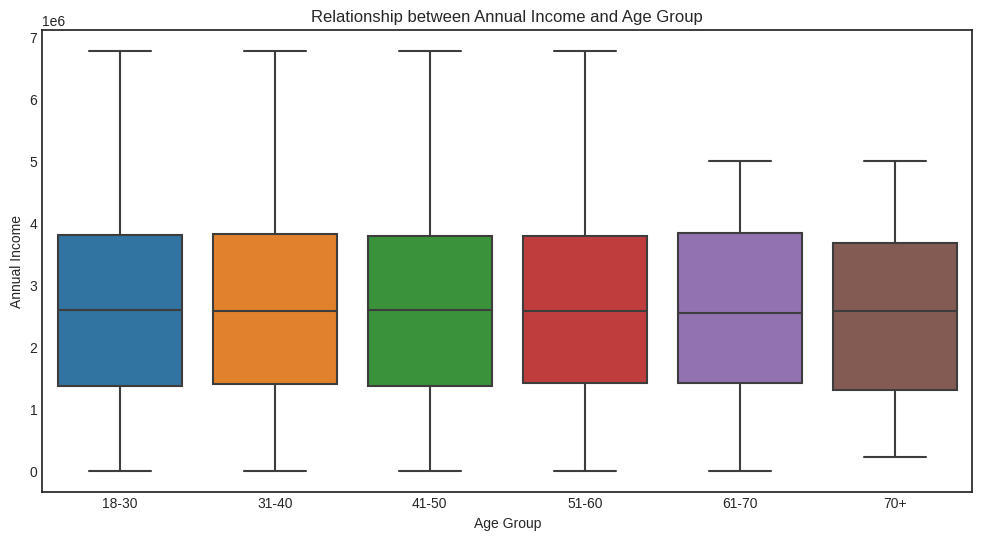

Correlation between age and annual income: 0.0006917529106581945


In [149]:
# Define age groups
import seaborn as sns
bins = [18, 30, 40, 50, 60, 70, 100]  # Adjust age group boundaries as needed
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Create age groups
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)

# Plotting the relationship using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='Annual Income', data=new_df)
plt.title('Relationship between Annual Income and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.show()

# Calculating correlation between age and annual income
correlation = new_df['age'].corr(new_df['Annual Income'])
print(f"Correlation between age and annual income: {correlation}")

UNIVARIATE ANALYSIS:

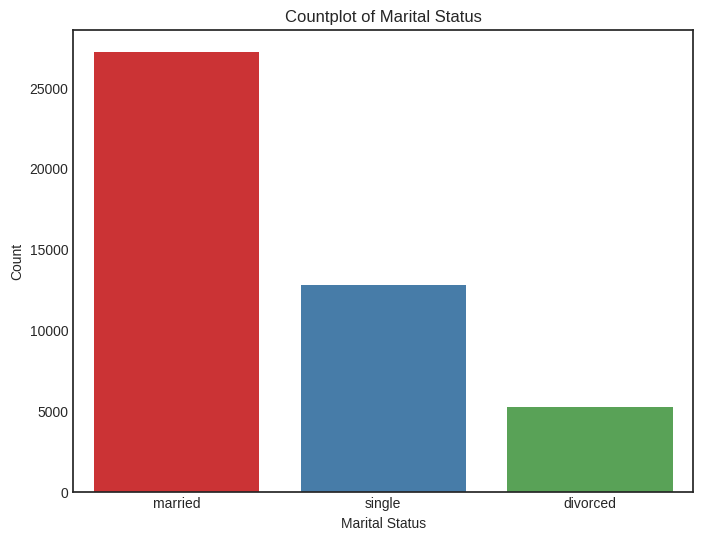

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'marital' variable
# Replace 'df' and column names with your actual DataFrame and column names

# Plotting the countplot for the 'marital' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=new_df, palette='Set1')
plt.title('Countplot of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

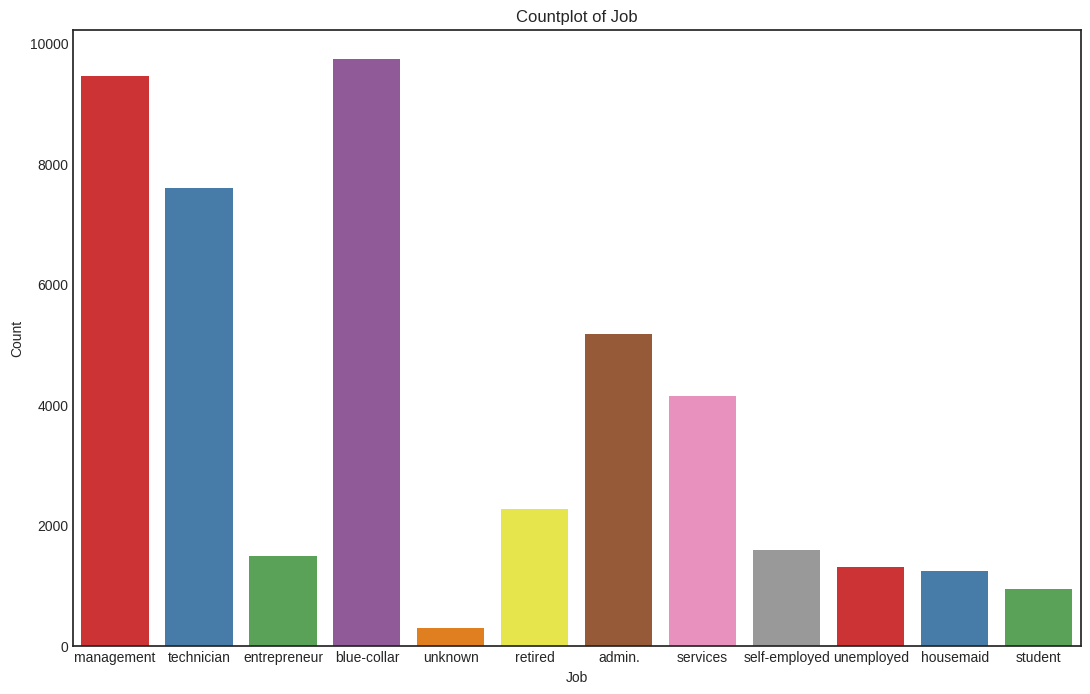

In [151]:
plt.figure(figsize=(13, 8))
sns.countplot(x='job', data=new_df, palette='Set1')
plt.title('Countplot of Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

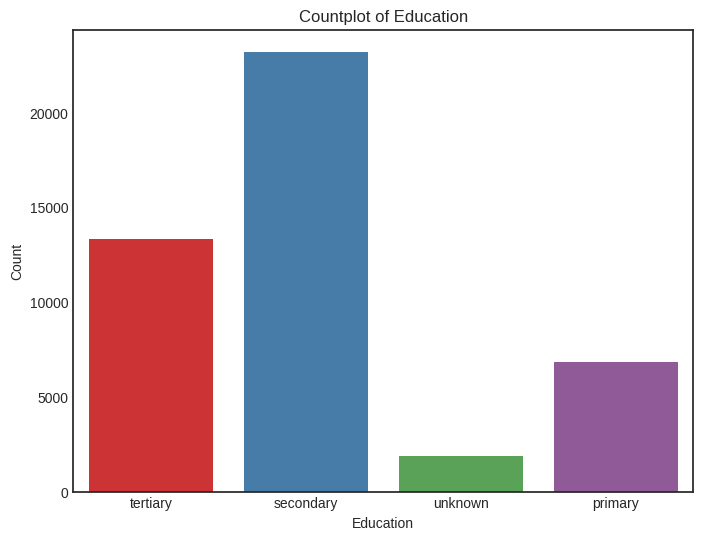

In [152]:
# Plotting the countplot for the 'marital' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=new_df, palette='Set1')
plt.title('Countplot of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

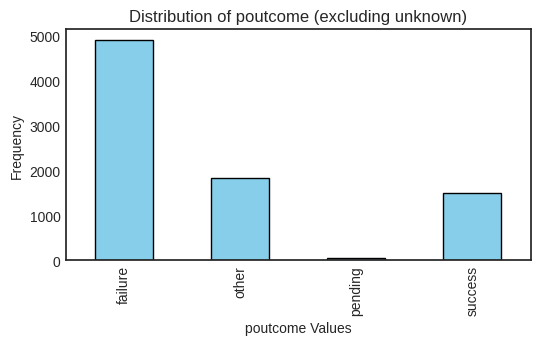

In [153]:
poutcome_filtered = new_df[new_df['poutcome'] != 'unknown']

# Plot the bar chart
plt.figure(figsize=(6, 3))
poutcome_filtered['poutcome'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of poutcome (excluding unknown)')
plt.xlabel('poutcome Values')
plt.ylabel('Frequency')
plt.show()


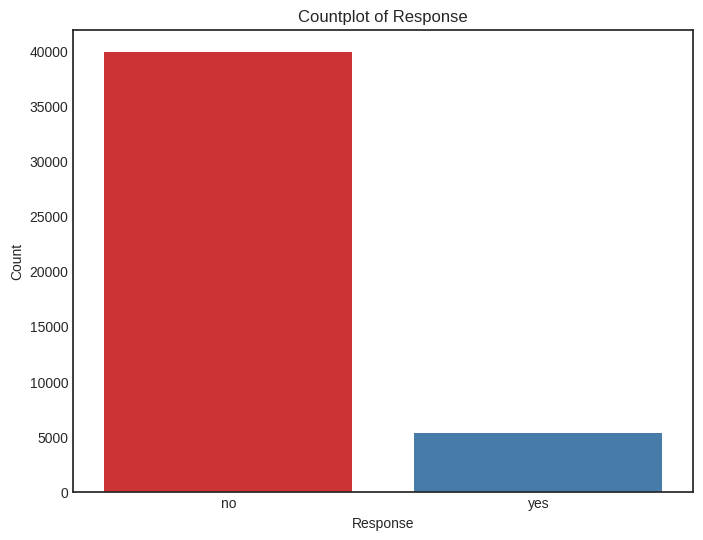

In [154]:
# Plotting the countplot for the 'marital' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=new_df, palette='Set1')
plt.title('Countplot of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

BIVARIATE ANALYSIS

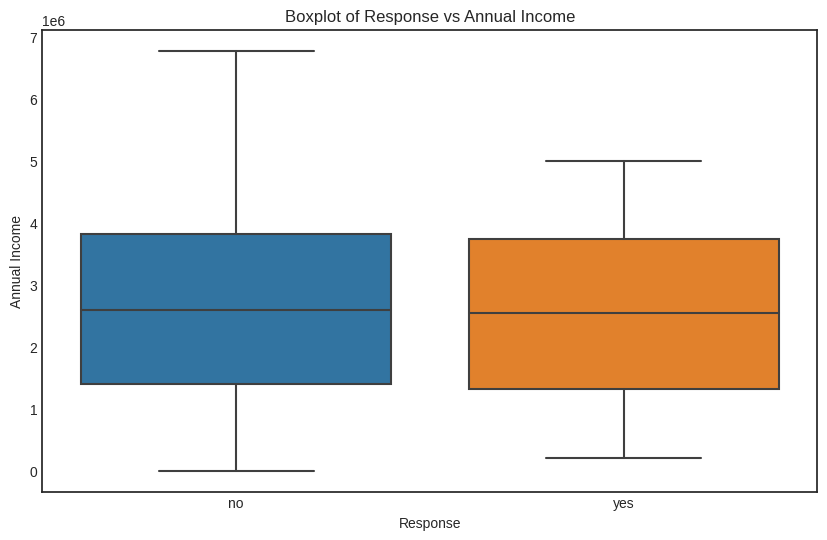

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Annual Income', data=new_df)
plt.title('Boxplot of Response vs Annual Income')
plt.xlabel('Response')
plt.ylabel('Annual Income')
plt.show()

In [157]:
response_group=df.groupby('Response')
response_group['Annual Income'].mean()

Response
no     2.601847e+06
yes    2.546646e+06
Name: Annual Income, dtype: float64

In [158]:
response_group['Annual Income'].median()

Response
no     2592310.0
yes    2537152.0
Name: Annual Income, dtype: float64

Text(0, 0.5, 'response %')

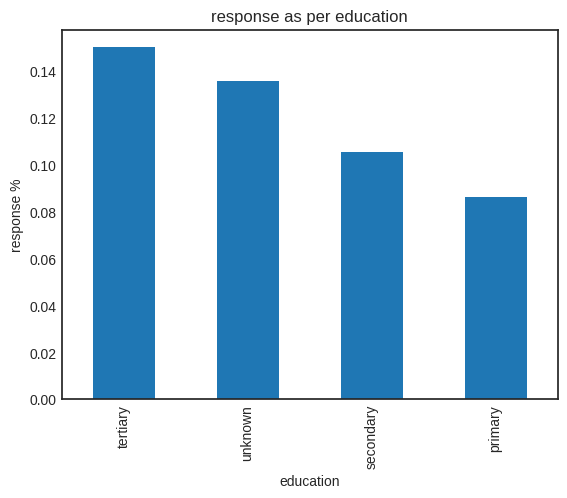

In [159]:
new_df['Response']=new_df['Response'].replace({'no':0,'yes':1})
new_df.groupby('education')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per education')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

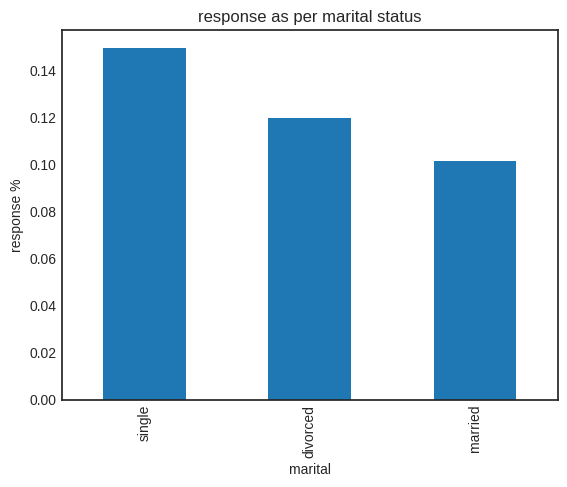

In [160]:
new_df.groupby('marital')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per marital status')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

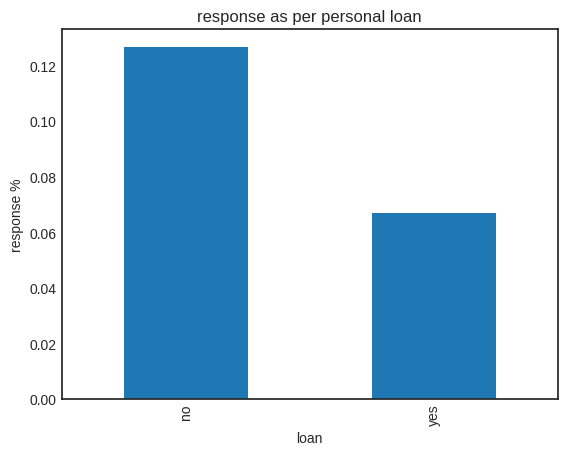

In [161]:
new_df.groupby('loan')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per personal loan')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

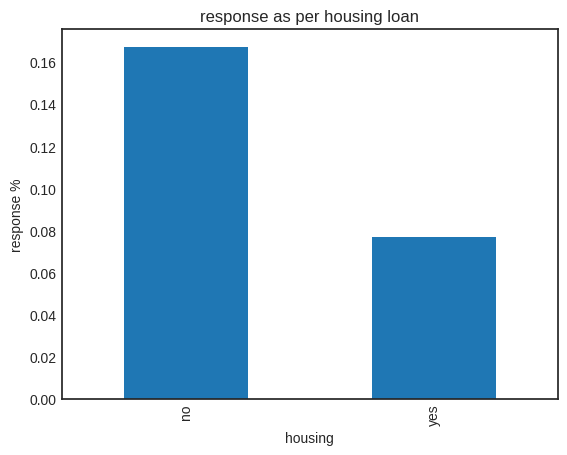

In [162]:
new_df.groupby('housing')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per housing loan')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

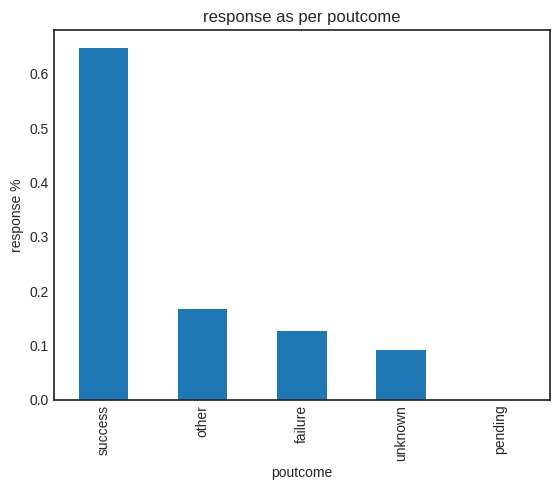

In [163]:
new_df.groupby('poutcome')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per poutcome')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

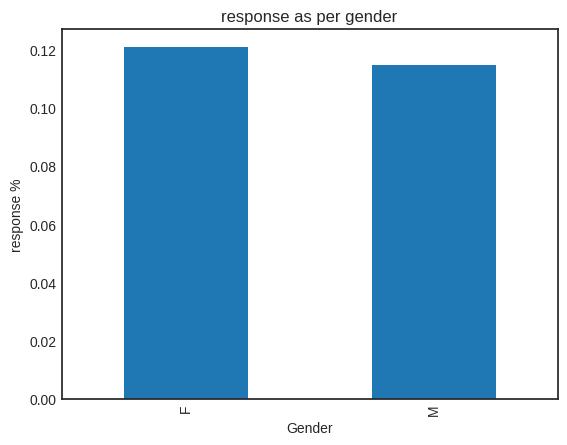

In [164]:
new_df.groupby('Gender')['Response'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per gender')
plt.ylabel('response %')

Text(0, 0.5, 'response %')

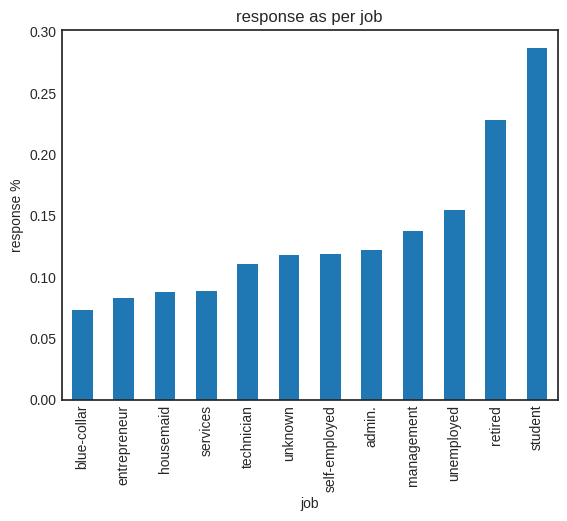

In [165]:
new_df.groupby('job')['Response'].mean().sort_values(ascending=True).plot.bar()
plt.title('response as per job')
plt.ylabel('response %')

ENCODING

In [166]:
dictionary={'yes':1,'no':0}
new_df['housing']=new_df['housing'].map(dictionary)
new_df['loan']=new_df['loan'].map(dictionary)
new_df['Insurance']=new_df['Insurance'].map(dictionary)

In [168]:
corr_matrix = df.corr()

<ipython-input-168-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [169]:
corr_matrix

,age,Annual Income,balance,duration,campaign,last_contact_day,previous,Count_Txn
age,1.000000,0.000883,0.099217,-0.001982,0.004087,-0.022328,0.002047,0.009555
Annual Income,0.000883,1.000000,0.005962,0.006193,-0.007354,-0.032172,-0.011037,0.001115
balance,0.099217,0.005962,1.000000,0.021395,-0.013521,0.001743,0.015294,-0.004497
duration,-0.001982,0.006193,0.021395,1.000000,-0.084560,-0.001631,0.001399,-0.003845
campaign,0.004087,-0.007354,-0.013521,-0.084560,1.000000,-0.088478,-0.032829,-0.002299
last_contact_day,-0.022328,-0.032172,0.001743,-0.001631,-0.088478,1.000000,0.453741,0.007255
previous,0.002047,-0.011037,0.015294,0.001399,-0.032829,0.453741,1.000000,-0.004421
Count_Txn,0.009555,0.001115,-0.004497,-0.003845,-0.002299,0.007255,-0.004421,1.000000


In [170]:
new_df.head()

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Response,Count_Txn,age_group
0,58.0,management,married,tertiary,839368.0,M,0,2143.0,1,0,cellular,261.0,1.0,2.0,0,unknown,0,351.0,51-60
1,44.0,technician,single,secondary,1452858.0,M,0,29.0,1,0,unknown,151.0,1.0,2.0,0,unknown,0,326.0,41-50
2,33.0,entrepreneur,married,secondary,4851383.0,F,0,2.0,1,1,unknown,76.0,1.0,2.0,0,unknown,0,422.0,31-40
3,47.0,blue-collar,married,unknown,3207754.0,F,0,1506.0,1,0,unknown,92.0,1.0,2.0,0,unknown,0,113.0,41-50
4,33.0,unknown,single,unknown,2562322.0,M,0,1.0,0,0,unknown,198.0,1.0,2.0,0,unknown,0,342.0,31-40


In [171]:
categorical_columns = ['contact','poutcome','job','education','Gender','marital']
# Create a dictionary to store mappings
encoded_mappings = {}

# Perform label encoding for each categorical column
for col in categorical_columns:
    label_encoder = LabelEncoder()
    new_df[col] = label_encoder.fit_transform(new_df[col])
    encoded_mappings[col] = {original_category: encoded_value for original_category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Print the mappings
print("\nEncoded value mappings:")
for col, mapping in encoded_mappings.items():
    print(f"{col}: {mapping}")



Encoded value mappings:
contact: {'Mobile': 0, 'cellular': 1, 'telephone': 2, 'unknown': 3}
poutcome: {'failure': 0, 'other': 1, 'pending': 2, 'success': 3, 'unknown': 4}
job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
education: {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Gender: {'F': 0, 'M': 1}
marital: {'divorced': 0, 'married': 1, 'single': 2}


In [172]:
new_df.drop('age_group', axis=1, inplace=True)

In [173]:
new_df.head()

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Response,Count_Txn
0,58.0,4,1,2,839368.0,1,0,2143.0,1,0,1,261.0,1.0,2.0,0,4,0,351.0
1,44.0,9,2,1,1452858.0,1,0,29.0,1,0,3,151.0,1.0,2.0,0,4,0,326.0
2,33.0,2,1,1,4851383.0,0,0,2.0,1,1,3,76.0,1.0,2.0,0,4,0,422.0
3,47.0,1,1,3,3207754.0,0,0,1506.0,1,0,3,92.0,1.0,2.0,0,4,0,113.0
4,33.0,11,2,3,2562322.0,1,0,1.0,0,0,3,198.0,1.0,2.0,0,4,0,342.0


In [188]:
new_df.tail()

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Response,Count_Txn
45206,51.000000,9,1,2,2229818.0,1,0,825.0,0,0,1,0.000000,0.0,0.0,0,4,1,152.0
45207,73.497085,5,0,0,2783556.0,1,0,1729.0,0,0,1,0.000000,0.0,0.0,0,4,1,334.0
45208,72.000000,5,1,1,443512.0,1,0,5715.0,0,0,1,1030.602246,5.0,184.0,3,3,1,381.0
45209,57.000000,1,1,1,4193684.0,0,0,668.0,0,0,2,0.000000,0.0,0.0,0,4,0,211.0
45210,37.000000,2,1,1,3617935.0,1,0,2971.0,0,0,1,361.000000,2.0,188.0,11,1,0,331.0


FEATURE ENGINEERING


STANDARDISING NUMERICAL VARIABLES

In [174]:
from sklearn.preprocessing import StandardScaler

df_scale=new_df.copy()
Categorical_variables=['Insurance','housing','loan','contact','job','marital', 'education', 'Gender','poutcome','Response']


feature_scale=[feature for feature in df_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(df_scale[feature_scale])

StandardScaler()

In [175]:
scaled_data = pd.concat([df_scale[['Insurance','housing','loan','contact','job','marital', 'education', 'Gender','poutcome','Response']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Insurance,housing,loan,contact,job,marital,education,Gender,poutcome,Response,age,Annual Income,balance,duration,campaign,last_contact_day,previous,Count_Txn
0,0,1,0,1,4,1,2,1,4,0,1.630997,-1.262170,0.414749,0.046501,-0.704397,-0.411303,-0.251964,0.444336
1,0,1,0,3,9,2,1,1,4,0,0.295753,-0.820990,-0.615733,-0.451481,-0.704397,-0.411303,-0.251964,0.227947
2,0,1,1,3,2,1,1,0,4,0,-0.753368,1.622999,-0.628894,-0.791014,-0.704397,-0.411303,-0.251964,1.058879
3,0,1,0,3,1,1,3,0,4,0,0.581877,0.441012,0.104240,-0.718581,-0.704397,-0.411303,-0.251964,-1.615682
4,0,0,0,3,11,2,3,1,4,0,-0.753368,-0.023139,-0.629382,-0.238707,-0.704397,-0.411303,-0.251964,0.366436


In [176]:
from scipy.stats import pointbiserialr


binary_output_variable = 'Response'
numerical_input_variables = ['balance', 'duration','campaign','last_contact_day','previous', 'Count_Txn','age','Annual Income']  # Replace with your actual numerical input variables

# Convert numerical input variables to numeric type, handling non-numeric values
scaled_data[numerical_input_variables] = scaled_data[numerical_input_variables].apply(pd.to_numeric, errors='coerce')

for numerical_input_variable in numerical_input_variables:
    correlation, p_value = pointbiserialr(scaled_data[binary_output_variable], scaled_data[numerical_input_variable])
    print(f"Point-Biserial Correlation for {numerical_input_variable}: {correlation}, p-value: {p_value}")

Point-Biserial Correlation for balance: 0.06632020003375229, p-value: 3.049014910257823e-45
Point-Biserial Correlation for duration: 0.4103834717639574, p-value: 0.0
Point-Biserial Correlation for campaign: -0.08131731499584063, p-value: 3.496759137675913e-67
Point-Biserial Correlation for last_contact_day: 0.09877383717409219, p-value: 2.2289575755513776e-98
Point-Biserial Correlation for previous: 0.09322115991423874, p-value: 8.598990999782219e-88
Point-Biserial Correlation for Count_Txn: -0.002647372267640718, p-value: 0.5735416852860428
Point-Biserial Correlation for age: 0.021917771962189428, p-value: 3.156448612220913e-06
Point-Biserial Correlation for Annual Income: -0.012526607265626011, p-value: 0.007737553138900949


In [177]:
from scipy.stats import chi2_contingency


categorical_output_variable = 'Response'  # Replace with your actual categorical output variable
categorical_input_variables = ['Insurance', 'housing', 'loan','contact','poutcome','job','marital','education','Gender']  # Replace with your actual categorical input variables

for categorical_input_variable in categorical_input_variables:
    # Create a contingency table for the current pair of variables
    contingency_table = pd.crosstab(scaled_data[categorical_output_variable], scaled_data[categorical_input_variable])

    # Perform the chi-squared test and calculate Cramér's V
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.sum(contingency_table.values)
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    print(f"Cramér's V for {categorical_input_variable}: {cramers_v}")

Cramér's V for Insurance: 0.022169364739516195
Cramér's V for housing: 0.13907423215431408
Cramér's V for loan: 0.06812131561389828
Cramér's V for contact: 0.15094938162510002
Cramér's V for poutcome: 0.31181057588584543
Cramér's V for job: 0.13587393679042542
Cramér's V for marital: 0.06603900562184567
Cramér's V for education: 0.07272777986435225
Cramér's V for Gender: 0.009517692850560412


In [178]:
from sklearn.ensemble import ExtraTreesClassifier
X=scaled_data.drop(['Response'],axis=1)
y=scaled_data.Response

In [179]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

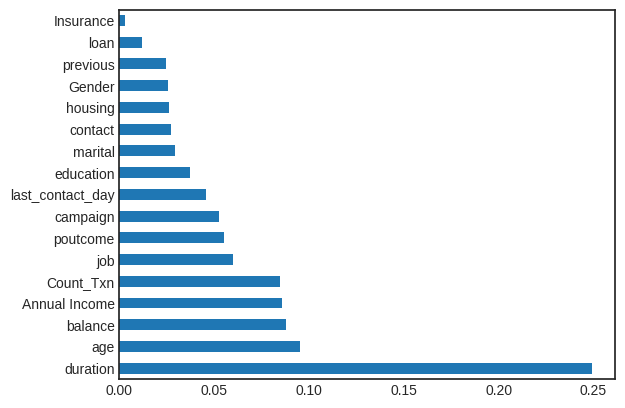

In [180]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [181]:
X=scaled_data.drop(['Insurance','loan','Gender','previous','contact','housing','Response'],axis=1)
y=scaled_data.Response

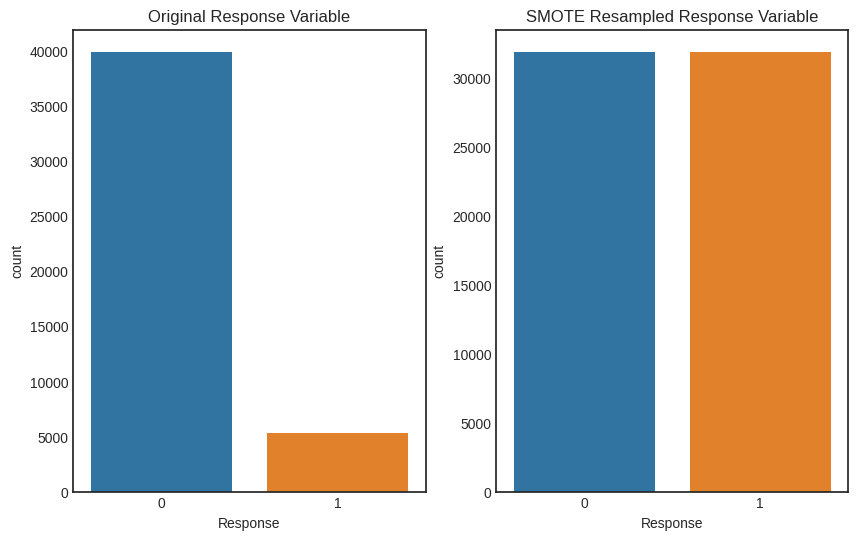

In [183]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot the countplot for the original and resampled response variable
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Response', data=new_df)
plt.title('Original Response Variable')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('SMOTE Resampled Response Variable')

plt.show()

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.7827
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.87      7997
           1       0.31      0.71      0.43      1044

    accuracy                           0.78      9041
   macro avg       0.63      0.75      0.65      9041
weighted avg       0.88      0.78      0.82      9041



In [185]:
# Instantiate the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)

Random Forest Classifier:
Accuracy: 0.8792
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7997
           1       0.48      0.54      0.51      1044

    accuracy                           0.88      9041
   macro avg       0.71      0.73      0.72      9041
weighted avg       0.89      0.88      0.88      9041



A PREDICTIVE SYSTEM:

In [190]:
input_data = (1,1,184,5,3,5,381,443512,5715,72,1030)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has not taken a Term Deposit')
else:
  print('The person has taken a Term Deposit')

[1]
The person has taken a Term Deposit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [191]:
input_data = (1,1,0,0,4,1,211,4193684,668,57,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has not taken a Term Deposit')
else:
  print('The person has taken a Term Deposit')

[0]
The person has not taken a Term Deposit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [192]:
import pickle

In [193]:
filename = 'trained_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [194]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))